In [2]:
#import library/packages 
from keras.models import Sequential
from keras.layers import Embedding
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from keras.preprocessing import sequence
from keras.layers import LSTM
from keras.layers import Flatten
from keras.preprocessing.sequence import pad_sequences
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from keras.layers.core import Dense, Activation, Dropout



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
df = pd.read_csv('/content/title_and_BOW.csv') # reading the data file
df['title'] = df['title'].astype(str) # converting title to str object
df.head(3) # looking at the first 3 

,title,BOW
0,7:19,7:19 demiánbichir héctorbonilla oscarserrano ...
1,23:59,23:59 teddchan stellachung henleyhii gilbertc...
2,9,9 elijahwood johnc.reilly jenniferconnelly sh...


In [4]:
sentences = df['BOW'].values  # getting the values in bag of words and assigning to sentences 
y = df['title'].values # getting the title values. This is the target data

In [5]:
# tokenizing data with max words of 5000
tokenizer = Tokenizer(num_words=5000) 
tokenizer.fit_on_texts(sentences)

# obtaining the max sentence 
word_count = lambda sentences: len(word_tokenize(sentences))
longest_sentence = max(sentences, key=word_count)
max_sentence_len = len(word_tokenize(longest_sentence))

# vocabular size 
vocab_size = len(tokenizer.word_index)+1

sentences = tokenizer.texts_to_sequences(sentences) # convert text to a sequence of words (or tokens).

padded_docs = pad_sequences(sentences,maxlen=max_sentence_len) # pads the sequence to the same length 


In [6]:
le = preprocessing.LabelEncoder() #using label encoder to encode text data
y = le.fit_transform(y) #passing in my target label to encode 

# Split arrays or matrices into random train and test subsets

X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.30, random_state = 1000)
X_train.shape,y_train.shape

((3485, 46), (3485,))

In [7]:
from keras import regularizers
from tensorflow.keras.layers import BatchNormalization

# creating the model 
input_dim = X_train.shape[1]

model = Sequential()

model.add(Embedding(vocab_size, 50, input_length=max_sentence_len))
model.add(BatchNormalization())

model.add(LSTM(128, input_shape=(X_train.shape[1:])))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(layers.Dense(7000, input_dim = input_dim,activation='relu'))
model.add(layers.Dense(7000, activation='sigmoid'))



model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [8]:
model.summary() # summary of the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 46, 50)            1480750   
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 50)            200       
_________________________________________________________________
lstm (LSTM)                  (None, 128)               91648     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 7000)              903000    
_________________________________________________________________
dense_1 (Dense)              (None, 7000)              4

In [9]:
history=model.fit(X_train,y_train, epochs=15, verbose=True, validation_data=(X_test,y_test),batch_size=256) # fit the data

Epoch 1/15
14/14 [==============================] - 19s 89ms/step - loss: 8.8695 - acc: 0.0234 - val_loss: 8.8582 - val_acc: 0.0368
Epoch 2/15
14/14 [==============================] - 1s 41ms/step - loss: 8.5357 - acc: 0.0341 - val_loss: 8.9400 - val_acc: 0.0368
Epoch 3/15
14/14 [==============================] - 1s 41ms/step - loss: 7.6400 - acc: 0.0350 - val_loss: 9.1246 - val_acc: 0.0368
Epoch 4/15
14/14 [==============================] - 1s 41ms/step - loss: 5.8917 - acc: 0.0463 - val_loss: 9.4431 - val_acc: 0.0368
Epoch 5/15
14/14 [==============================] - 1s 41ms/step - loss: 1.4954 - acc: 0.8412 - val_loss: 9.3860 - val_acc: 0.0341
Epoch 6/15
14/14 [==============================] - 1s 40ms/step - loss: 0.1961 - acc: 0.9699 - val_loss: 9.3405 - val_acc: 0.0174
Epoch 7/15
14/14 [==============================] - 1s 42ms/step - loss: 0.0559 - acc: 0.9920 - val_loss: 9.2746 - val_acc: 0.0281
Epoch 8/15
14/14 [==============================] - 1s 42ms/step - loss: 0.0265 - 

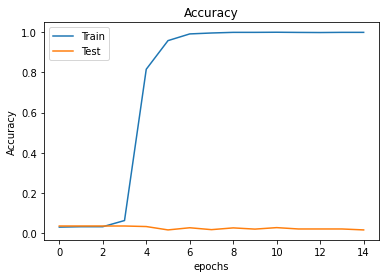

In [13]:
# plotting the data
plt.figure()
plt.plot(history.history['acc'], label='Train')
plt.plot(history.history['val_acc'], label='Test')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

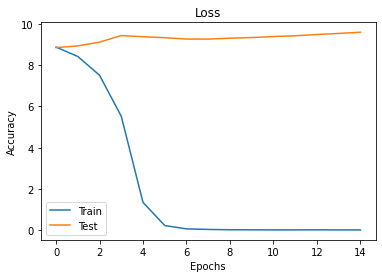

In [14]:
# plotting the data
plt.figure()
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()